# Data Cleaning for Motor Trader Website Data

This data is scrapped from Motor Trader website. The script for scraping can be found [here]().

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("motor_trader.csv")

Let's have a look at the data.

In [3]:
data.head(10)

,Name,URL,Price
0,2007 TOYOTA CAMRY 2.0E,https://www.motortrader.com.my/usedcar/1907200...,"VOC RM 37,800"
1,2018 MERCEDES-BENZ E-CLASS E300 2.0 AMG LINE (...,https://www.motortrader.com.my/usedcar/1907200...,"VOC RM 308,800"
2,2010 MERCEDES-BENZ E-CLASS E250 1.8 CKD (A) BE...,https://www.motortrader.com.my/usedcar/1907200...,"VOC RM 87,800"
3,2014 TOYOTA LAND CRUISER Toyota LANDCRUISER PR...,https://www.motortrader.com.my/usedcar/1903250...,"179,800"
4,2009 BMW 5 SERIES Bmw 535i GT 3.0 FULLSPEC FUL...,https://www.motortrader.com.my/usedcar/1904080...,"94,800"
5,2017 MERCEDES-BENZ E-CLASS Mercedes Benz E200 ...,https://www.motortrader.com.my/usedcar/1812200...,"238,500"
6,2012 MAZDA CX-5 CBU SUNROOF FULL LEATHER,https://www.motortrader.com.my/usedcar/1906160...,"68,600"
7,2010 AUDI TT 2.0 S LINE TFSI (A) BEST DEAL,https://www.motortrader.com.my/usedcar/1907200...,"VOC RM 79,800"
8,2013 NISSAN URVAN Nissan URVAN 3.0 (M) WINDOWS...,https://www.motortrader.com.my/usedcar/1907120...,"57,200"
9,2011 PROTON INSPIRA 2011 PROTON INSPIRA 2.0 FU...,https://www.motortrader.com.my/usedcar/1905240...,"31,800"


First, duplicate values can best be checked by using the URL. Next, the duplicate rows are removed from the dataFrame, while resetting the index.

In [4]:
data.URL.nunique(), data.URL.duplicated().sum()

(970, 30)

In [5]:
data = data.drop_duplicates(subset="URL", keep='first').reset_index().drop(columns='index')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970 entries, 0 to 969
Data columns (total 3 columns):
Name     970 non-null object
URL      970 non-null object
Price    970 non-null object
dtypes: object(3)
memory usage: 22.8+ KB


It seems like there is a structure to the `Name` column in which the first element refers to the year of the model, followed by the name of the manufacturer. These can be extracted to form new columns using list comprehension.

In [7]:
data["Year"] = [int(i.split()[0]) for i in data["Name"]]

In [8]:
data["Manufacturer"] = [i.split()[1] for i in data["Name"]]

The model name of the vehicle is also in the `Name` column. Although it differs in number of words, we can still extract it.

In [9]:
data["Model"] = [str(i.split()[2:6]).replace(",", "").replace("'", "")[1:-1] for i in data["Name"]]

The `Price` column needs to be converted into `int`. Therefore, removal of any letters and commas is necessary.

In [10]:
data["Price"] = [int(i.replace("VOC RM",'').split()[0].replace(",", "")) for i in data["Price"]]

It appears that the engine capacity can also be extracted from the `Name` column. Since the position is different from row to row, we can find it using regular expression.

In [11]:
import re

data["Engine"] = [str(re.findall("\d\.\d", i))[2:5] for i in data["Name"]]

In [12]:
data.head(10)

,Name,URL,Price,Year,Manufacturer,Model,Engine
0,2007 TOYOTA CAMRY 2.0E,https://www.motortrader.com.my/usedcar/1907200...,37800,2007,TOYOTA,CAMRY 2.0E,2.0
1,2018 MERCEDES-BENZ E-CLASS E300 2.0 AMG LINE (...,https://www.motortrader.com.my/usedcar/1907200...,308800,2018,MERCEDES-BENZ,E-CLASS E300 2.0 AMG,2.0
2,2010 MERCEDES-BENZ E-CLASS E250 1.8 CKD (A) BE...,https://www.motortrader.com.my/usedcar/1907200...,87800,2010,MERCEDES-BENZ,E-CLASS E250 1.8 CKD,1.8
3,2014 TOYOTA LAND CRUISER Toyota LANDCRUISER PR...,https://www.motortrader.com.my/usedcar/1903250...,179800,2014,TOYOTA,LAND CRUISER Toyota LANDCRUISER,2.7
4,2009 BMW 5 SERIES Bmw 535i GT 3.0 FULLSPEC FUL...,https://www.motortrader.com.my/usedcar/1904080...,94800,2009,BMW,5 SERIES Bmw 535i,3.0
5,2017 MERCEDES-BENZ E-CLASS Mercedes Benz E200 ...,https://www.motortrader.com.my/usedcar/1812200...,238500,2017,MERCEDES-BENZ,E-CLASS Mercedes Benz E200,
6,2012 MAZDA CX-5 CBU SUNROOF FULL LEATHER,https://www.motortrader.com.my/usedcar/1906160...,68600,2012,MAZDA,CX-5 CBU SUNROOF FULL,
7,2010 AUDI TT 2.0 S LINE TFSI (A) BEST DEAL,https://www.motortrader.com.my/usedcar/1907200...,79800,2010,AUDI,TT 2.0 S LINE,2.0
8,2013 NISSAN URVAN Nissan URVAN 3.0 (M) WINDOWS...,https://www.motortrader.com.my/usedcar/1907120...,57200,2013,NISSAN,URVAN Nissan URVAN 3.0,3.0
9,2011 PROTON INSPIRA 2011 PROTON INSPIRA 2.0 FU...,https://www.motortrader.com.my/usedcar/1905240...,31800,2011,PROTON,INSPIRA 2011 PROTON INSPIRA,2.0


Next, a count plot is used to further inspect the data.

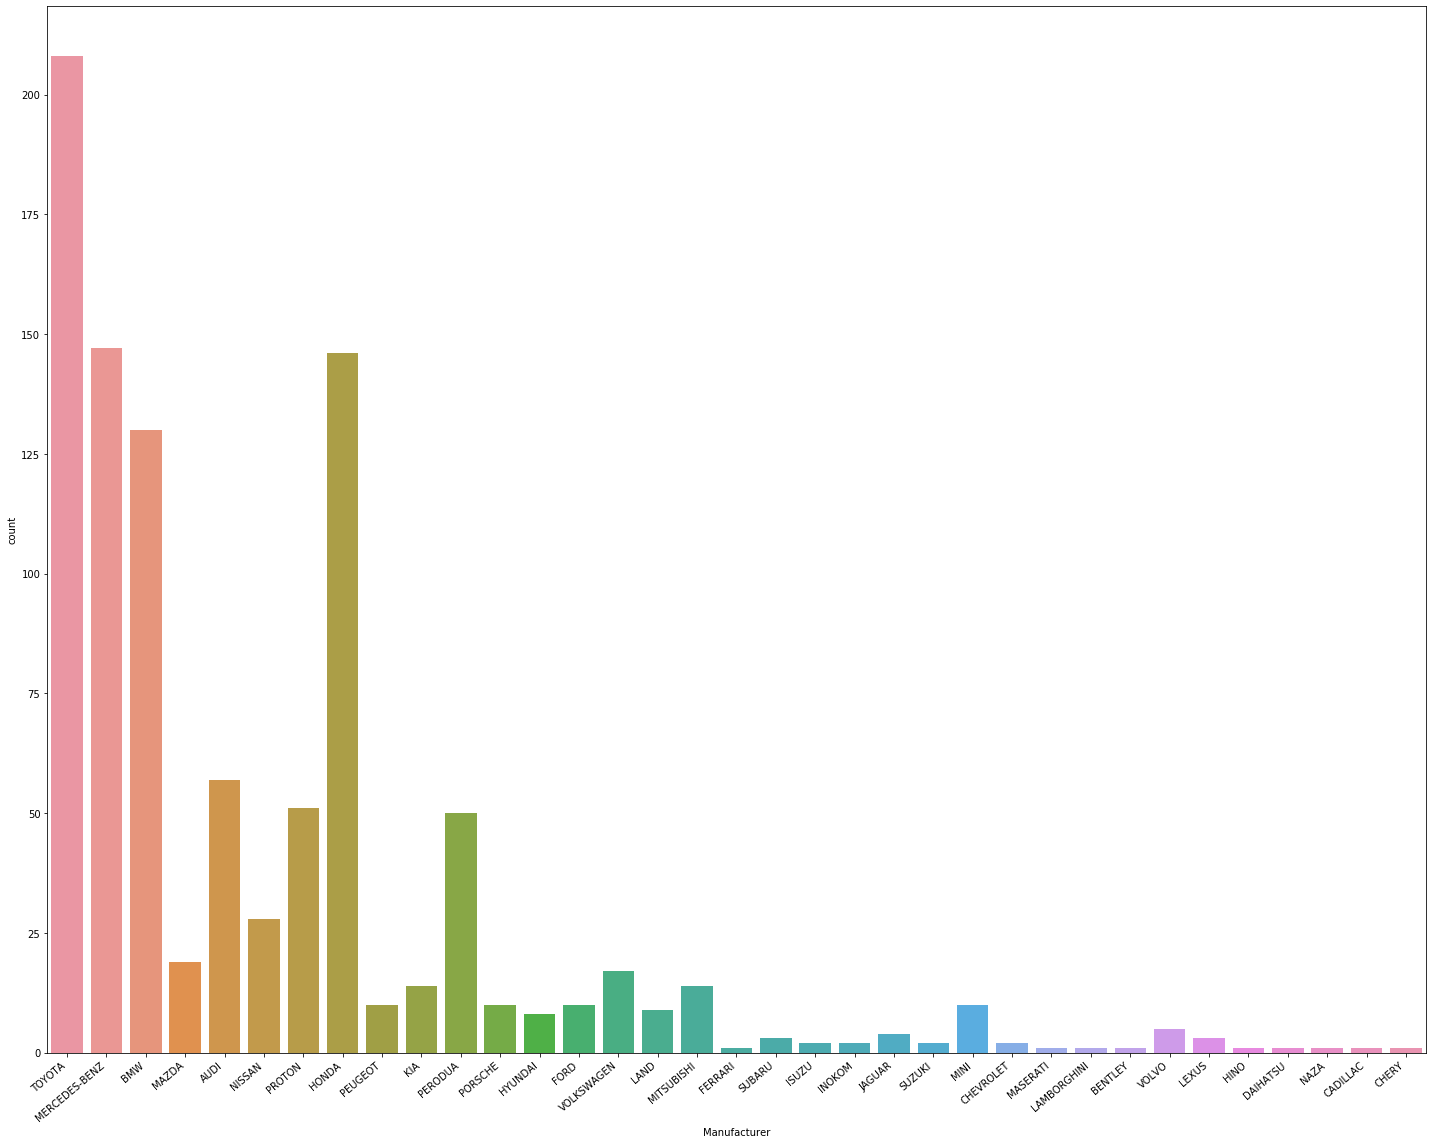

In [13]:
import seaborn as sns
plt.figure(figsize=(20,16))
plot = sns.countplot(x=data["Manufacturer"])
plot.set_xticklabels(plot.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout();
plt.show;

From the plot, we can see that the manufacturers are all recognizable, except for 'Land'. This refers to 'Land Rover'. It can be fixed by replacing the name with 'Land Rover' and subsequently removing the first 'Rover' in the `Model` column.

In [14]:
data["Manufacturer"] = [i.replace("LAND", "LAND ROVER") for i in data.Manufacturer]

In [15]:
data["Model"] = [i.replace("ROVER", "", 1) for i in data.Model]

In [16]:
data[data["Manufacturer"] == "LAND ROVER"]

,Name,URL,Price,Year,Manufacturer,Model,Engine
63,2014 LAND ROVER EVOQUE Si4 2.0 Dyanamic -9Spee...,https://www.motortrader.com.my/usedcar/1902280...,176800,2014,LAND ROVER,EVOQUE Si4 2.0,2.0
93,2015 LAND ROVER RANGE ROVER VOGUE AUTOBIOGRAPH...,https://www.motortrader.com.my/usedcar/1903300...,635000,2015,LAND ROVER,RANGE ROVER VOGUE,
274,2014 LAND ROVER RANGE ROVER SPORT 3.0 SPORT SU...,https://www.motortrader.com.my/usedcar/1907190...,308800,2014,LAND ROVER,RANGE ROVER SPORT,3.0
315,2014 LAND ROVER RANGE ROVER SPORT 3.0 PETROL S...,https://www.motortrader.com.my/usedcar/1907190...,308000,2014,LAND ROVER,RANGE ROVER SPORT,3.0
335,2009 LAND ROVER FREELANDER 2 2.2 diesel,https://www.motortrader.com.my/usedcar/1903060...,59800,2009,LAND ROVER,FREELANDER 2 2.2,2.2
337,1996 LAND ROVER RANGE ROVER 4.6 (A) V8 SPORT D...,https://www.motortrader.com.my/usedcar/1806180...,22800,1996,LAND ROVER,RANGE ROVER 4.6,4.6
357,2013 LAND ROVER EVOQUE RANGE ROVER 2.2 AUTO DI...,https://www.motortrader.com.my/usedcar/1906070...,135800,2013,LAND ROVER,EVOQUE RANGE ROVER,2.2
362,2013 LAND ROVER RANGE ROVER VOGUE 2017 AUTOBIO...,https://www.motortrader.com.my/usedcar/1904170...,388800,2013,LAND ROVER,RANGE ROVER VOGUE,4.4
485,2006 LAND ROVER RANGE ROVER SPORT 4.2 V8 SUPER...,https://www.motortrader.com.my/usedcar/1907180...,100000,2006,LAND ROVER,RANGE ROVER SPORT,4.2


Since there is only one row without the engine capacity, the value is found on Google and is inserted manually.

In [17]:
%%capture
data.set_value(93, 'Engine', '5.0')

In [18]:
data[data["Engine"] == '']

,Name,URL,Price,Year,Manufacturer,Model,Engine
5,2017 MERCEDES-BENZ E-CLASS Mercedes Benz E200 ...,https://www.motortrader.com.my/usedcar/1812200...,238500,2017,MERCEDES-BENZ,E-CLASS Mercedes Benz E200,
6,2012 MAZDA CX-5 CBU SUNROOF FULL LEATHER,https://www.motortrader.com.my/usedcar/1906160...,68600,2012,MAZDA,CX-5 CBU SUNROOF FULL,
15,2011 MERCEDES-BENZ E-CLASS E250 CGI BLUE EFFIC...,https://www.motortrader.com.my/usedcar/1907200...,89008,2011,MERCEDES-BENZ,E-CLASS E250 CGI BLUE,
16,2016 KIA CERATO K3 HIGH SPEC HD REVERSE CAMERA...,https://www.motortrader.com.my/usedcar/1907200...,49888,2016,KIA,CERATO K3 HIGH SPEC,
23,2009 MERCEDES-BENZ S-CLASS Mercedes Benz S300L...,https://www.motortrader.com.my/usedcar/1903130...,74700,2009,MERCEDES-BENZ,S-CLASS Mercedes Benz S300L,
25,2011 MERCEDES-BENZ C-CLASS C180 BlueEFF CGi C2...,https://www.motortrader.com.my/usedcar/1902220...,64600,2011,MERCEDES-BENZ,C-CLASS C180 BlueEFF CGi,
29,2006 MERCEDES-BENZ E-CLASS E240 Full Spec Avan...,https://www.motortrader.com.my/usedcar/1907200...,31888,2006,MERCEDES-BENZ,E-CLASS E240 Full Spec,
34,2009 TOYOTA ALPHARD 240G (A) OTR PRICE NO MORE...,https://www.motortrader.com.my/usedcar/1907200...,109333,2009,TOYOTA,ALPHARD 240G (A) OTR,
35,2006 MERCEDES-BENZ E-CLASS E240 1 OWNER ORI PA...,https://www.motortrader.com.my/usedcar/1907200...,31888,2006,MERCEDES-BENZ,E-CLASS E240 1 OWNER,
37,2018 MERCEDES-BENZ GLC 250 16K KM FS UW2022,https://www.motortrader.com.my/usedcar/1907200...,268800,2018,MERCEDES-BENZ,GLC 250 16K KM,


There are 184 rows without engine capacity. Different manufacturer used different naming styles that may or may not include the engine capacity.

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970 entries, 0 to 969
Data columns (total 7 columns):
Name            970 non-null object
URL             970 non-null object
Price           970 non-null int64
Year            970 non-null int64
Manufacturer    970 non-null object
Model           970 non-null object
Engine          970 non-null object
dtypes: int64(2), object(5)
memory usage: 53.1+ KB


Further cleaning:

- BWM models used a unique convention in their engine capacity. For example the model 320i has an engine capacity of '2.0'.
- Mercedes-Benz models are similar to BMW, but different model classes follow different ways to determine the engine capacity.
- Mazda models has no engine capacity written in the `Name` column.